1. Sommario dei dati utilizzati

a. Breve descrizione di ciascun titolo selezionato e motivazione della scelta

Settori: automobili, tecnologia e medicina

notizie che ritengo rilevanti al fine di generare una crescita di interesse verso l'azienda "nome_azienda":

nome_azienda = "TESLA"
1. Partorisce in una Tesla mentre l'autopilot la porta in ospedale
link notizia: https://www.corriere.it/motori/news/nuova-mobilita/21_dicembre_21/partorisce-traffico-una-tesla-l-autopilot-impostato-l-ospedale-97648fd6-6239-11ec-a583-0974d17fd3de.shtml

2. Nuovamente premiata la sicurezza Tesla: pieni voti ai crash test della model Y 2022
link notizia: https://www.automoto.it/elettrico/nuovamente-premiata-la-sicurezza-tesla-pieni-voti-ai-crash-test-della-model-y-2022-video.html


nome_azienda = "Ford Motors":
1. Uno dei maggiori competitor di Tesla
https://mywallst.com/blog/teslas-competitors/


nome_azienda = "META PLATFORMS"
1. L'annuncio della posizione/mission che Facebook vuole adottare nel futuro verso il metaverso ha suscitato un enorme interesse verso di essa. Soprattutto la nascita di esperienze legate al metaverso e al mondo NFT come The Sandbox e la partecipazione in quest'ultimo da parte di grandi aziende fa capire la direzione che assuemerà la tecnologia e l'economia del futuro. Più che futuro è un cambiamento che sta avvenendo già adesso.
link presentazione meta: https://www.youtube.com/watch?v=Uvufun6xer8&t=4086s
link the sandbox: https://www.everyeye.it/articoli/provato-the-sandbox-prova-primi-passi-metaverso-55547.html


nome_azienda = "APPLE"
1. Apple è sul punto di superare una capitalizzazione di mercato di 3000 miliardi di dollari, diventando potenzialmente la prima azienda al mondo a riuscirci
link notizia: https://it.investing.com/news/stock-market-news/target-price-su-apple-nuovo-massimo-da-wall-street-2031992


nome_azienda = "NOVAVAX"
1.  le azioni Novavax Inc (NASDAQ:NVAX) hanno avuto un rialzo dopo che la società ha annunciato che l'Agenzia europea per i medicinali ha raccomandato la concessione dell'autorizzazione all'immissione in commercio condizionata per il suo vaccino anti-Covid, NVX-CoV2373, al fine di prevenire il COVID-19 nelle persone di età pari o superiore a 18 anni.
link notizia: https://it.investing.com/news/stock-market-news/novavax-perche-il-titolo-e-in-aumento-oggi-2032994


nome_azienda = "VIATRIS"
1. Viatris Inc. una nuova azienda con la mission della global healthcare è stata aggiunta alla lista degli America's most Responsible Companies 2022. Premio riconosciuto da Newsweek e Statista Inc., il miglior portale al mondo di statistica e ranking aziendali. La lista a cui è stata aggiunta, riconosce le top 500 responsible companies negli Stati Uniti. Si sono classificati 167 esimi e nella Top 20 nella categoria Health Care & Life Sciences.
link notizia: https://www.prnewswire.com/news-releases/viatris-named-by-newsweek-as-one-of-americas-most-responsible-companies-301437781.html



_______________________________________________________________________________________________________________________

In [2]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install yfinance

b. Funzioni utilizzate per scaricare i dati da Yahoo! Finance o da altri siti

In [3]:
import pandas as pd
import yfinance as yf

meta_df = yf.download('FB', start='2011-11-30', end='2021-11-30')
apple_df = yf.download('AAPL', start='2011-11-30', end='2021-11-30')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


c. Funzioni utilizzate per la fusione delle serie in un unico DataFrame

d. Presentazione dei dati con un grafico e le prime righe del DataFrame

In [4]:
meta_apple = meta_df.join(apple_df, lsuffix="_Meta", rsuffix="_Apple")
meta_apple.head()

,Open_Meta,High_Meta,Low_Meta,Close_Meta,Adj Close_Meta,Volume_Meta,Open_Apple,High_Apple,Low_Apple,Close_Apple,Adj Close_Apple,Volume_Apple
Date,,,,,,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,19.070000,19.407499,18.649286,18.942142,16.240328,732292400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,19.089287,20.055000,19.073214,20.045713,17.186495,631106000
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,20.341070,20.495714,19.735001,19.891787,17.054520,694870400
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,19.910713,20.457144,19.758215,20.377144,17.470648,584897600
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,20.566786,20.589287,20.043928,20.190001,17.310205,496230000


_______________________________________________________________________________________________________________________

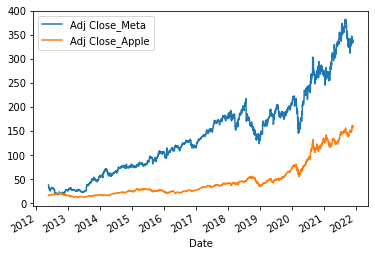

In [5]:
import matplotlib.pyplot as plt
meta_apple = meta_apple[["Adj Close_Meta", "Adj Close_Apple"]]
meta_apple.plot(grid = True)
plt.grid()
plt.show()

_______________________________________________________________________________________________________________________

Chiusura: Chiaramente le stesse librerie vengono utilizzate per tutte le aziende prese in considerazioni. Ciò che ho riportato sopra è un esempio di applicazione di utilizzo.

_______________________________________________________________________________________________________

2. Statistiche Descrittive

_______________________________________________________________________________________________________________________________

In [6]:
import pandas as pd
import numpy as np
import yfinance as yf
#Tecnologia
meta_df = yf.download('FB', start='2011-11-30', end='2021-11-30')
meta_df = meta_df.groupby(pd.Grouper(freq='M')).mean()
meta_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-31,33.015556,33.868889,31.057778,31.870000,31.870000,1.390570e+08
2012-06-30,29.537143,30.232381,28.893333,29.540476,29.540476,3.180526e+07
2012-07-31,29.143333,29.598095,28.437619,28.880000,28.880000,2.477094e+07
2012-08-31,20.287391,20.644783,19.768696,20.108261,20.108261,5.008456e+07
2012-09-30,20.629474,21.089474,20.170526,20.627895,20.627895,5.571809e+07


_______________________________________________________________________________________________________________________________

a. Calcolare i rendimenti semplici e composti e visualizzarli in un grafico

_______________________________________________________________________________________________________________________________

Rendimenti Semplici

_______________________________________________________________________________________________________________________________

In [7]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
#Tecnologia

apple_df = yf.download('AAPL', start='2011-11-30', end='2021-11-30')
apple_df = apple_df.groupby(pd.Grouper(freq='M')).mean()

meta_month_returns = meta_df[['Adj Close']]
apple_month_returns = apple_df[['Adj Close']]
rendimenti_df = pd.DataFrame()

rendimenti_netti_meta = np.log(meta_month_returns/meta_month_returns.shift(1))
rendimenti_lordi_meta = np.log(rendimenti_netti_meta + 1)

rendimenti_netti_apple = np.log(apple_month_returns/apple_month_returns.shift(1))
rendimenti_lordi_apple = np.log(rendimenti_netti_apple + 1)

rendimenti_df["Rendimenti Netti Meta"] = rendimenti_netti_meta
rendimenti_df["Rendimenti Lordi Meta"] = rendimenti_lordi_meta
rendimenti_df["Rendimenti Netti Apple"] = rendimenti_netti_apple
rendimenti_df["Rendimenti Lordi Apple"] = rendimenti_lordi_apple
rendimenti_df = rendimenti_df.dropna()

rendimenti_df

[*********************100%***********************]  1 of 1 completed


,Rendimenti Netti Meta,Rendimenti Lordi Meta,Rendimenti Netti Apple,Rendimenti Lordi Apple
Date,,,,
2012-06-30,-0.075904,-0.078939,0.017361,0.017212
2012-07-31,-0.022612,-0.022872,0.045100,0.044112
2012-08-31,-0.362019,-0.449446,0.070179,0.067826
2012-09-30,0.025514,0.025194,0.059794,0.058074
2012-10-31,-0.000406,-0.000406,-0.071222,-0.073885
...,...,...,...,...
2021-07-31,0.049158,0.047988,0.110479,0.104792
2021-08-31,0.026913,0.026557,0.021945,0.021707
2021-09-30,0.002614,0.002611,0.001136,0.001135


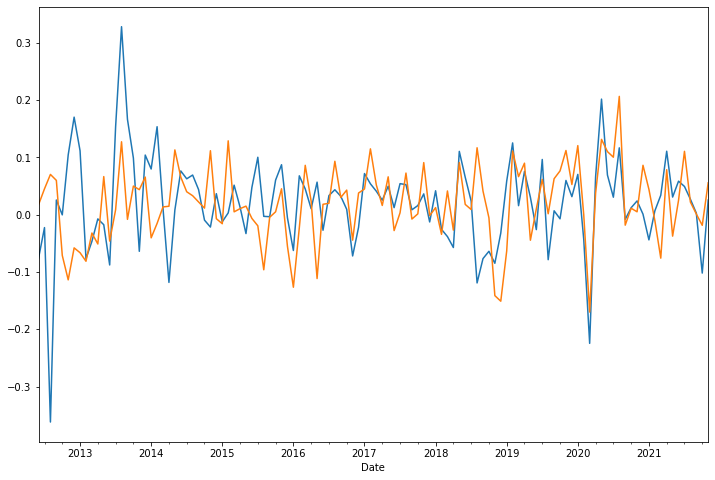

In [8]:
rendimenti_df["Rendimenti Netti Meta"].plot(figsize=(12,8))
rendimenti_df["Rendimenti Netti Apple"].plot(figsize=(12,8))
plt.show()

_______________________________________________________________________________________________________

Rendimenti Composti

_______________________________________________________________________________________________________________________________

In [9]:
cum_daily_return_meta = (1 + rendimenti_netti_meta).cumprod()
rendimenti_df["Rendimenti Composti Meta"] = cum_daily_return_meta

cum_daily_return_apple = (1 + rendimenti_netti_apple).cumprod()
rendimenti_df["Rendimenti Composti Apple"] = cum_daily_return_apple
rendimenti_df[["Rendimenti Composti Meta", "Rendimenti Composti Apple"]]


,Rendimenti Composti Meta,Rendimenti Composti Apple
Date,,
2012-06-30,0.924096,1.478520
2012-07-31,0.903201,1.545200
2012-08-31,0.576225,1.653641
2012-09-30,0.590927,1.752518
2012-10-31,0.590687,1.627701
...,...,...
2021-07-31,7.487620,9.381608
2021-08-31,7.689137,9.587484
2021-09-30,7.709239,9.598375


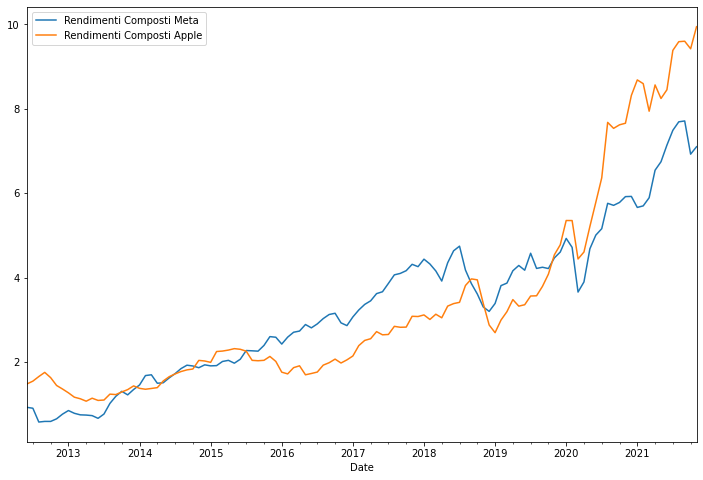

In [10]:
rendimenti_df[["Rendimenti Composti Meta", "Rendimenti Composti Apple"]].plot(figsize=(12,8))
plt.show()

____________________________________________________________________________________________________________________________

Che cosa hanno in comune le serie storiche, ci sono momenti di rendimenti molto lontani dalla media?

____________________________________________________________________________________________________________________________

In [11]:
#Tecnologia
meta_df = yf.download('FB', start='2011-11-30', end='2021-11-30')
apple_df = yf.download('AAPL', start='2011-11-30', end='2021-11-30')
apple_meta_df = meta_df.join(apple_df, lsuffix='_Meta', rsuffix='_Apple')
apple_meta_df = apple_meta_df.groupby(pd.Grouper(freq='M')).mean()
apple_meta_df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open_Meta,High_Meta,Low_Meta,Close_Meta,Adj Close_Meta,Volume_Meta,Open_Apple,High_Apple,Low_Apple,Close_Apple,Adj Close_Apple,Volume_Apple
Date,,,,,,,,,,,,
2012-05-31,33.015556,33.868889,31.057778,31.870000,31.870000,1.390570e+08,20.066706,20.355040,19.782024,20.142738,17.269679,5.410574e+08
2012-06-30,29.537143,30.232381,28.893333,29.540476,29.540476,3.180526e+07,20.523605,20.674609,20.329048,20.520085,17.593206,3.740869e+08
2012-07-31,29.143333,29.598095,28.437619,28.880000,28.880000,2.477094e+07,21.414643,21.604320,21.238589,21.466718,18.404814,4.242691e+08
2012-08-31,20.287391,20.644783,19.768696,20.108261,20.108261,5.008456e+07,22.911708,23.094829,22.754938,22.953432,19.742854,3.598351e+08
2012-09-30,20.629474,21.089474,20.170526,20.627895,20.627895,5.571809e+07,24.361372,24.535996,24.146260,24.341730,20.959353,4.841582e+08


In [12]:
apple_meta_df = apple_meta_df[['Adj Close_Meta', 'Adj Close_Apple']]
apple_meta_df.head()

,Adj Close_Meta,Adj Close_Apple
Date,,
2012-05-31,31.870000,17.269679
2012-06-30,29.540476,17.593206
2012-07-31,28.880000,18.404814
2012-08-31,20.108261,19.742854
2012-09-30,20.627895,20.959353


In [13]:
apple_meta_returns = apple_meta_df.pct_change()
apple_meta_returns = apple_meta_returns.dropna()
apple_meta_returns.head()

,Adj Close_Meta,Adj Close_Apple
Date,,
2012-06-30,-0.073095,0.018734
2012-07-31,-0.022358,0.046132
2012-08-31,-0.303731,0.072701
2012-09-30,0.025842,0.061617
2012-10-31,-0.000406,-0.068745


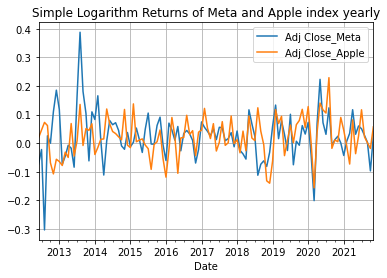

In [14]:
apple_meta_returns.plot(grid=True, title = 'Simple Logarithm Returns of Meta and Apple index yearly');

Apple:

Nel periodo 2015-2016 c'è stato un decremento di domanda da parte dell'Asia verso i prodotti Apple, questo spiega la consguente perdita con un ritorno semplice atteso che passò da positivo del 32% ad un negativo -11%.

(articolo di Fortune scritto nel 2016)
Gli analisti avevano ampiamente previsto un simile risultato, in parte perché le vendite di iPhone nei primi tre mesi del 2015 sono state artificialmente aumentate da gravi carenze di approvvigionamento che hanno ritardato le vendite dall'ultimo trimestre del 2014. 
Un altro fattore è stato il rafforzamento del dollaro USA dal 2015, che ha effettivamente ridotto il valore delle vendite di Apple all'estero di oltre 2 miliardi di dollari, ovvero circa 4%.
link articolo: https://fortune.com/2016/05/06/apple-shares-two-year-low/
link articolo: https://fortune.com/2016/04/26/apple-future-update-iphone/



Nel periodo 2019-2020 da 11% a 85%
La crescita esplosiva di AirPods, lo slancio promettente per l'Apple Watch e la promessa di un più grande salto tecnologico e delle funzionalità per la linea di iPhone nel 2020 hanno alimentato un grande anno per le azioni Apple.
Toni Sacconaghi, analista di Bernstein Research, stima che le vendite di AirPod siano state di circa 6 miliardi di dollari nel 2019 e siano quasi raddoppiate rispetto al 2018. L'analista di Bernstein prevede che le entrate di AirPod raggiungeranno i 15 miliardi di dollari nel 2020.
link articolo: https://www.fool.com/investing/2020/01/12/why-apple-stock-soared-862-in-2019.aspx



Facebook/Meta:

Nel periodo 2017-2019 il ritorno semplice atteso delle azioni di Facebook passarono da un 34% ad un 0.9% a fine 2019.
Dovuto ai seguenti eventi:

-Dichiarazione di Mark Zuckemberg:
Gli utenti spendono meno tempo sulla sua piattaforma.

-Cambridge Analitica: 
il più grande scandalo nella storia di facebook.
Un ricercatore esterno ha raccolto e poi venduto i dati personali di decine di milioni di utenti alla società di analisi che ha aiutato a eleggere il presidente di Donald Trump. 
La rivelazione ha dato il via a una serie di eventi, tra cui un'indagine formale della Federal Trade Commission sulle pratiche sulla privacy di Facebook che ha portato a una multa di 5 miliardi di dollari un anno dopo.

-Earning disaster:
La società ha mancato in modo insolito le stime sugli utili per le entrate e la crescita degli utenti, alimentando le preoccupazioni che i suoi scandali avessero finalmente colpito l'azienda. Facebook ha perso 121 miliardi di dollari di valore di mercato in seguito al rapporto.

immagine:
https://assets.bwbx.io/images/users/iqjWHBFdfxIU/iQ2BOKamCy58/v2/pidjEfPlU1QWZop3vfGKsrX.ke8XuWirGYh1PKgEw44kE/-1x-1.png


Nel 2020 allo scoppio della pandemia Meta ha incrementato il valore delle proprie azioni del 33% 
grazie all'aumento dei suoi utenti e i livelli di coinvolgimento durante la pandemia di coronavirus.
Poiché le persone cercavano modi per rimanere in contatto con la famiglia e gli amici rimanendo al sicuro.
link articolo: https://www.fool.com/investing/2021/01/02/why-facebook-stock-jumped-33-in-2020/

____________________________________________________________________________________________________________________________

correlazione tra Apple e Meta?

____________________________________________________________________________________________________________________________

In [15]:
import seaborn as sns

data_df = yf.download('FB AAPL', start='2011-11-30', end='2021-11-30')
data_df = data_df['Adj Close']
returns = data_df.pct_change()
returns = returns.dropna()
correlation = returns.corr()
correlation

[*********************100%***********************]  2 of 2 completed


,AAPL,FB
AAPL,1.000000,0.402076
FB,0.402076,1.000000


<AxesSubplot:>

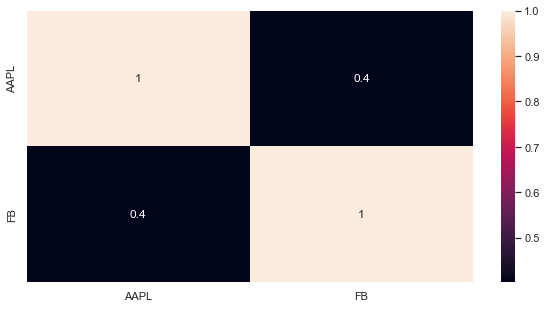

In [16]:
sns.set(rc ={'figure.figsize' : (10, 5)})
sns.heatmap(correlation, annot=True)

Possiamo vedere come, esiste una correlazione positiva del 0.4 tra apple e meta come si poteva intuire.

_______________________________________________________________________________________________________________________________

In [17]:
#Automobili
import pandas as pd
import yfinance as yf

ford_df = yf.download('F', start='2011-11-30', end='2021-11-30')
tesla_df = yf.download('TSLA', start='2011-11-30', end='2021-11-30')
ford_tesla_df = ford_df.join(tesla_df, lsuffix='_Ford', rsuffix='_Tesla')
ford_tesla_df = ford_tesla_df.groupby(pd.Grouper(freq='M')).mean()
ford_tesla_df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open_Ford,High_Ford,Low_Ford,Close_Ford,Adj Close_Ford,Volume_Ford,Open_Tesla,High_Tesla,Low_Tesla,Close_Tesla,Adj Close_Tesla,Volume_Tesla
Date,,,,,,,,,,,,
2011-11-30,10.180000,10.365000,10.0450,10.295000,6.943752,5.368305e+07,6.499000,6.600000,6.385000,6.449000,6.449000,3.378500e+06
2011-12-31,10.700476,10.852381,10.5000,10.674286,7.199571,4.773234e+07,6.004667,6.114762,5.876000,5.996000,5.996000,5.030595e+06
2012-01-31,12.089500,12.292500,11.9365,12.163000,8.208563,6.324036e+07,5.551200,5.654100,5.391900,5.498000,5.498000,6.402475e+06
2012-02-29,12.562500,12.674000,12.4000,12.522500,8.479299,4.492407e+07,6.502900,6.641700,6.363500,6.552400,6.552400,5.798400e+06
2012-03-31,12.513182,12.627727,12.3900,12.505000,8.467449,4.378027e+07,7.027000,7.156818,6.916455,7.048182,7.048182,5.037159e+06


In [18]:
ford_tesla_df = ford_tesla_df[['Adj Close_Ford', 'Adj Close_Tesla']]
ford_tesla_df.head()

,Adj Close_Ford,Adj Close_Tesla
Date,,
2011-11-30,6.943752,6.449000
2011-12-31,7.199571,5.996000
2012-01-31,8.208563,5.498000
2012-02-29,8.479299,6.552400
2012-03-31,8.467449,7.048182


_______________________________________________________________________________________________________

2. Statistiche Descrittive

_______________________________________________________________________________________________________

a. Calcolare i rendimenti semplici e composti e visualizzarli in un grafico

_______________________________________________________________________________________________________

Rendimenti Semplici

_______________________________________________________________________________________________________

In [19]:
import numpy as np
import matplotlib.pyplot as plt

rendimenti_df = pd.DataFrame()
tesla_df = tesla_df.groupby(pd.Grouper(freq='M')).mean()
ford_df = ford_df.groupby(pd.Grouper(freq='M')).mean()

tesla_df = tesla_df[['Adj Close']]
ford_df = ford_df[['Adj Close']]

rendimenti_netti_tesla = np.log(tesla_df/tesla_df.shift(1))
rendimenti_lordi_tesla = np.log(rendimenti_netti_tesla + 1)

rendimenti_netti_ford = np.log(ford_df/ford_df.shift(1))
rendimenti_lordi_ford = np.log(rendimenti_netti_ford + 1)

rendimenti_df["Rendimenti Netti Tesla"] = rendimenti_netti_tesla
rendimenti_df["Rendimenti Lordi Tesla"] = rendimenti_lordi_tesla
rendimenti_df["Rendimenti Netti Ford"] = rendimenti_netti_ford
rendimenti_df["Rendimenti Lordi Ford"] = rendimenti_lordi_ford
rendimenti_df = rendimenti_df.dropna()
rendimenti_df = rendimenti_df.groupby(pd.Grouper(freq='M')).mean()
rendimenti_df.head()

,Rendimenti Netti Tesla,Rendimenti Lordi Tesla,Rendimenti Netti Ford,Rendimenti Lordi Ford
Date,,,,
2011-12-31,-0.072832,-0.075621,0.036179,0.035540
2012-01-31,-0.086708,-0.090700,0.131156,0.123241
2012-02-29,0.175447,0.161648,0.032450,0.031935
2012-03-31,0.072938,0.070401,-0.001399,-0.001399
2012-04-30,-0.050811,-0.052148,-0.049301,-0.050558


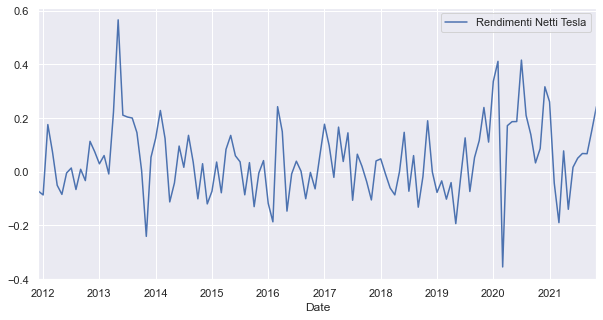

In [20]:
rendimenti_df[["Rendimenti Netti Tesla"]].plot(figsize=(10,5))
plt.show()

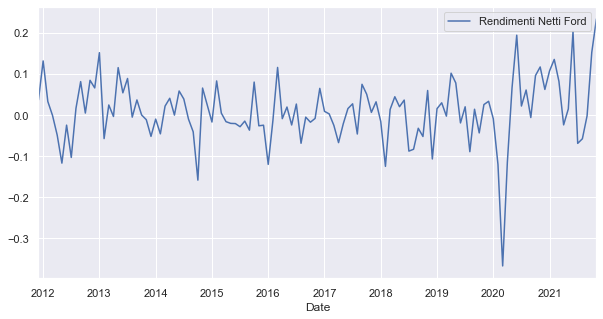

In [21]:
rendimenti_df[["Rendimenti Netti Ford"]].plot(figsize=(10,5))
plt.show()

_______________________________________________________________________________________________________

Rendimenti Composti

_______________________________________________________________________________________________________

In [22]:
cum_daily_return_tesla = (1 + rendimenti_netti_tesla).cumprod()
rendimenti_df["Rendimenti Composti Tesla"] = cum_daily_return_tesla

cum_daily_return_ford = (1 + rendimenti_netti_ford).cumprod()
rendimenti_df["Rendimenti Composti Ford"] = cum_daily_return_ford
rendimenti_df = rendimenti_df.dropna()
rendimenti_df[["Rendimenti Composti Tesla", "Rendimenti Composti Ford"]].head()

,Rendimenti Composti Tesla,Rendimenti Composti Ford
Date,,
2011-12-31,0.927168,1.036179
2012-01-31,0.846775,1.172081
2012-02-29,0.995339,1.210115
2012-03-31,1.067937,1.208422
2012-04-30,1.013673,1.148846


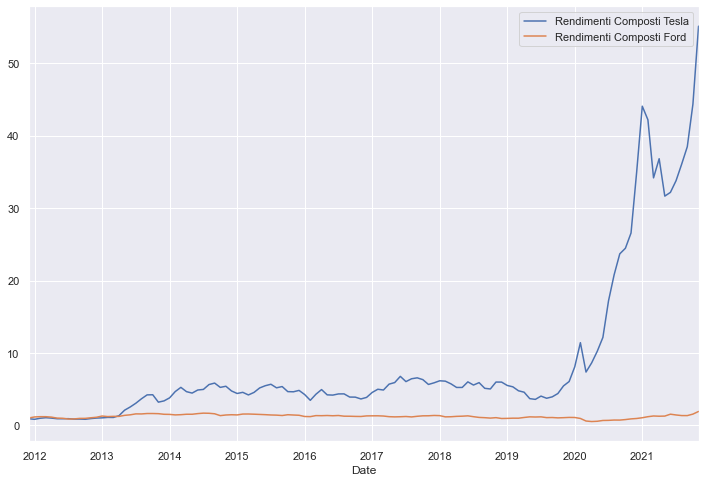

In [23]:
rendimenti_df[["Rendimenti Composti Tesla", "Rendimenti Composti Ford"]].plot(figsize=(12,8))
plt.show()

_______________________________________________________________________________________________________

Che cosa hanno in comune le serie storiche, ci sono momenti di rendimenti molto lontani dalla media?

_______________________________________________________________________________________________________

In [24]:
ford_df = yf.download('F', start='2011-11-30', end='2021-11-30')
tesla_df = yf.download('TSLA', start='2011-11-30', end='2021-11-30')
ford_tesla_df = ford_df.join(tesla_df, lsuffix='_Ford', rsuffix='_Tesla')
ford_tesla_df = ford_tesla_df.groupby(pd.Grouper(freq='M')).mean()
ford_tesla_df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open_Ford,High_Ford,Low_Ford,Close_Ford,Adj Close_Ford,Volume_Ford,Open_Tesla,High_Tesla,Low_Tesla,Close_Tesla,Adj Close_Tesla,Volume_Tesla
Date,,,,,,,,,,,,
2011-11-30,10.180000,10.365000,10.0450,10.295000,6.943752,5.368305e+07,6.499000,6.600000,6.385000,6.449000,6.449000,3.378500e+06
2011-12-31,10.700476,10.852381,10.5000,10.674286,7.199572,4.773234e+07,6.004667,6.114762,5.876000,5.996000,5.996000,5.030595e+06
2012-01-31,12.089500,12.292500,11.9365,12.163000,8.208563,6.324036e+07,5.551200,5.654100,5.391900,5.498000,5.498000,6.402475e+06
2012-02-29,12.562500,12.674000,12.4000,12.522500,8.479300,4.492407e+07,6.502900,6.641700,6.363500,6.552400,6.552400,5.798400e+06
2012-03-31,12.513182,12.627727,12.3900,12.505000,8.467449,4.378027e+07,7.027000,7.156818,6.916455,7.048182,7.048182,5.037159e+06


In [25]:
ford_tesla_df = ford_tesla_df[["Adj Close_Ford", "Adj Close_Tesla"]]
ford_tesla_df_returns = ford_tesla_df.pct_change()
ford_tesla_df_returns = ford_tesla_df_returns.dropna()
ford_tesla_df_returns.head()

,Adj Close_Ford,Adj Close_Tesla
Date,,
2011-12-31,0.036842,-0.070243
2012-01-31,0.140146,-0.083055
2012-02-29,0.032982,0.191779
2012-03-31,-0.001398,0.075664
2012-04-30,-0.048105,-0.049542


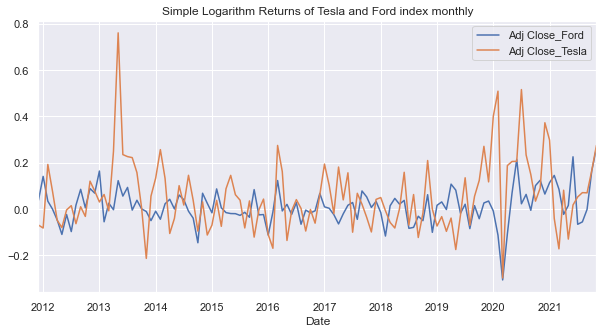

In [26]:
ford_tesla_df_returns.plot(grid=True, title = 'Simple Logarithm Returns of Tesla and Ford index monthly');

drop a Marzo 2020 sia per Ford che per Tesla per via della pandemia COVID.

Ford:
drop nel 2019, le azioni Ford sono scese dopo che la società ha riportato i guadagni del secondo trimestre ed inferiori alle aspettative.
La casa automobilistica ha anche pubblicato le sue previsioni per il 2019, ma anche queste sono risultate inferiori alle stime.
Ford, che quest'anno ha tagliato migliaia di posti di lavoro, sta investendo anche 11 miliardi di dollari entro il 2022 in veicoli elettrici e ibridi.
link articolo: https://www.cnbc.com/2019/07/24/ford-earnings-q2-2019.html

Dal 2020 le azioni di Ford Motor stanno aumentando perché il nuovo CEO Jim Farley sta andando veloce.
La velocità con cui sta trasformando Ford da produttore di auto a benzina a produttore di veicoli elettrici e connessi sta impressionando gli investitori. Gli analisti di Wall Street affermano che la casa automobilistica sta andando nella giusta direzione.
link articolo: https://www.barrons.com/articles/fords-ev-plan-wall-street-analysts-51622120481


Tesla:
novembre 2021 drop dopo che il CEO Elon Musk ha postato la decisione su twitter di vendere il 10% delle sue azioni nel settore dei veicoli elettrici.

link articolo: https://www.marketwatch.com/story/tesla-stock-tumbles-toward-2nd-bear-market-in-6-months-2020-09-08
link articolo: https://www.cnbc.com/2021/11/12/tesla-stock-had-its-worst-week-in-20-months-after-musk-sold-shares.html
    

_______________________________________________________________________________________________________

correlazione tra Ford e Tesla?

_______________________________________________________________________________________________________

In [27]:
import seaborn as sns

correlation_ford_tesla = ford_tesla_df_returns.corr()
correlation_ford_tesla

,Adj Close_Ford,Adj Close_Tesla
Adj Close_Ford,1.000000,0.247853
Adj Close_Tesla,0.247853,1.000000


<AxesSubplot:>

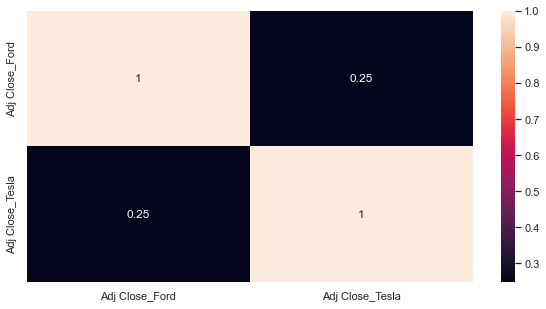

In [28]:
sns.set(rc ={'figure.figsize' : (10, 5)})
sns.heatmap(correlation_ford_tesla, annot=True)

Possiamo vedere anche qui come, seppure esiste una correlazione positiva tra tesla e ford del 0.25, quest'ultima sia abbastanza debole.

_______________________________________________________________________________________________________

In [29]:
#Medicina
nova_df = yf.download('NVAX', start='2011-11-30', end='2021-11-30')
viatris_df = yf.download('VTRS', start='2011-11-30', end='2021-11-30')
nova_viatris_df = nova_df.join(viatris_df, lsuffix='_Nova', rsuffix='_Viatris')
nova_viatris_df = nova_viatris_df.groupby(pd.Grouper(freq='M')).mean()
nova_viatris_df.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open_Nova,High_Nova,Low_Nova,Close_Nova,Adj Close_Nova,Volume_Nova,Open_Viatris,High_Viatris,Low_Viatris,Close_Viatris,Adj Close_Viatris,Volume_Viatris
Date,,,,,,,,,,,,
2011-11-30,25.800000,26.900001,24.900001,26.400001,26.400001,28902.500000,18.655001,19.105000,18.540000,19.010000,18.576971,7.455150e+06
2011-12-31,27.076190,27.838095,26.314286,26.923810,26.923810,33706.904762,20.566190,20.852381,20.339524,20.599048,20.129822,5.585424e+06
2012-01-31,27.290000,28.530000,26.720000,27.520000,27.520000,61173.000000,21.598500,21.830500,21.334000,21.571500,21.080123,5.464170e+06
2012-02-29,28.370000,28.810000,27.580000,28.040000,28.040000,32645.750000,22.875500,23.207500,22.635000,22.959500,22.436506,6.308110e+06
2012-03-31,26.627273,27.018182,26.090909,26.400000,26.400000,30542.954545,22.962273,23.143636,22.751818,22.964091,22.440992,4.632941e+06


In [30]:
nova_viatris_df = nova_viatris_df[['Adj Close_Nova', 'Adj Close_Viatris']]
nova_viatris_df.head()

,Adj Close_Nova,Adj Close_Viatris
Date,,
2011-11-30,26.400001,18.576971
2011-12-31,26.923810,20.129822
2012-01-31,27.520000,21.080123
2012-02-29,28.040000,22.436506
2012-03-31,26.400000,22.440992


_______________________________________________________________________________________________________

2. Statistiche Descrittive

_______________________________________________________________________________________________________

a. Calcolare i rendimenti semplici e composti e visualizzarli in un grafico

_______________________________________________________________________________________________________

Rendimenti Semplici

_______________________________________________________________________________________________________

In [31]:
import numpy as np
import matplotlib.pyplot as plt

rendimenti_df = pd.DataFrame()
nova_df = nova_df.groupby(pd.Grouper(freq='M')).mean()
viatris_df = viatris_df.groupby(pd.Grouper(freq='M')).mean()

nova_df = nova_df[['Adj Close']]
viatris_df = viatris_df[['Adj Close']]

rendimenti_netti_nova = np.log(nova_df/nova_df.shift(1))
rendimenti_lordi_nova = np.log(rendimenti_netti_nova + 1)

rendimenti_netti_viatris = np.log(viatris_df/viatris_df.shift(1))
rendimenti_lordi_viatris = np.log(rendimenti_netti_viatris + 1)

rendimenti_df["Rendimenti Netti Nova"] = rendimenti_netti_nova
rendimenti_df["Rendimenti Lordi Nova"] = rendimenti_lordi_nova
rendimenti_df["Rendimenti Netti Viatris"] = rendimenti_netti_viatris
rendimenti_df["Rendimenti Lordi Viatris"] = rendimenti_lordi_viatris
rendimenti_df = rendimenti_df.dropna()
rendimenti_df = rendimenti_df.groupby(pd.Grouper(freq='M')).mean()
rendimenti_df.head()

,Rendimenti Netti Nova,Rendimenti Lordi Nova,Rendimenti Netti Viatris,Rendimenti Lordi Viatris
Date,,,,
2011-12-31,0.019647,0.019456,0.080280,0.077220
2012-01-31,0.021902,0.021666,0.046128,0.045096
2012-02-29,0.018719,0.018546,0.062359,0.060492
2012-03-31,-0.060268,-0.062161,0.000200,0.000200
2012-04-30,-0.062924,-0.064991,-0.030512,-0.030987


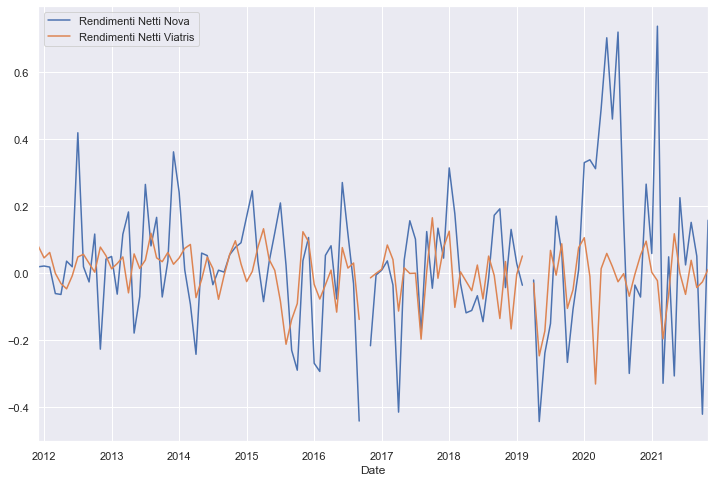

In [32]:
rendimenti_df[["Rendimenti Netti Nova", "Rendimenti Netti Viatris"]].plot(figsize=(12,8))
plt.show()

_______________________________________________________________________________________________________

Rendimenti Composti

_______________________________________________________________________________________________________

In [33]:
cum_daily_return_nova = (1 + rendimenti_netti_nova).cumprod()
rendimenti_df["Rendimenti Composti Nova"] = cum_daily_return_nova

cum_daily_return_viatris = (1 + rendimenti_netti_viatris).cumprod()
rendimenti_df["Rendimenti Composti Viatris"] = cum_daily_return_viatris
rendimenti_df = rendimenti_df.dropna()
rendimenti_df[["Rendimenti Composti Nova", "Rendimenti Composti Viatris"]]

,Rendimenti Composti Nova,Rendimenti Composti Viatris
Date,,
2011-12-31,1.019647,1.080280
2012-01-31,1.041979,1.130111
2012-02-29,1.061484,1.200583
2012-03-31,0.997511,1.200823
2012-04-30,0.934744,1.164184
...,...,...
2021-07-31,0.041850,0.480638
2021-08-31,0.048215,0.499363
2021-09-30,0.050689,0.478168


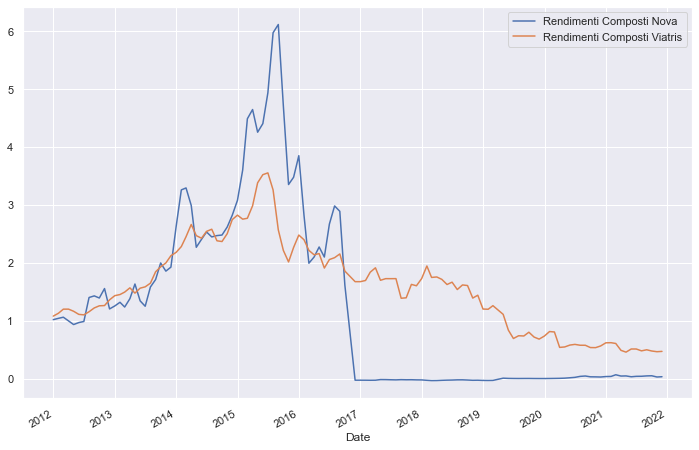

In [34]:
rendimenti_df[["Rendimenti Composti Nova", "Rendimenti Composti Viatris"]].plot(figsize=(12,8))
plt.show()

_______________________________________________________________________________________________________

Che cosa hanno in comune le serie storiche, ci sono momenti di rendimenti molto lontani dalla media?

_______________________________________________________________________________________________________

In [35]:
nova_viatris_df.head()

,Adj Close_Nova,Adj Close_Viatris
Date,,
2011-11-30,26.400001,18.576971
2011-12-31,26.923810,20.129822
2012-01-31,27.520000,21.080123
2012-02-29,28.040000,22.436506
2012-03-31,26.400000,22.440992


In [36]:
nova_viatris_df = nova_viatris_df[["Adj Close_Nova", "Adj Close_Viatris"]]
nova_viatris_returns = nova_viatris_df.pct_change()
nova_viatris_returns = nova_viatris_returns.dropna()
nova_viatris_returns.head()

,Adj Close_Nova,Adj Close_Viatris
Date,,
2011-12-31,0.019841,0.083590
2012-01-31,0.022144,0.047209
2012-02-29,0.018895,0.064344
2012-03-31,-0.058488,0.000200
2012-04-30,-0.060985,-0.030051


In [37]:
moderna_df = yf.download('MRNA', start='2018-12-07', end='2021-11-30')
moderna_df = moderna_df[["Adj Close"]]
moderna_returns_df = moderna_df.pct_change()
moderna_returns_df = moderna_returns_df.dropna()
moderna_returns_df = moderna_returns_df.groupby(pd.Grouper(freq='M')).mean()
moderna_returns_df.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2018-12-31,-0.012011
2019-01-31,0.004798
2019-02-28,0.017586
2019-03-31,-0.004356
2019-04-30,0.013061


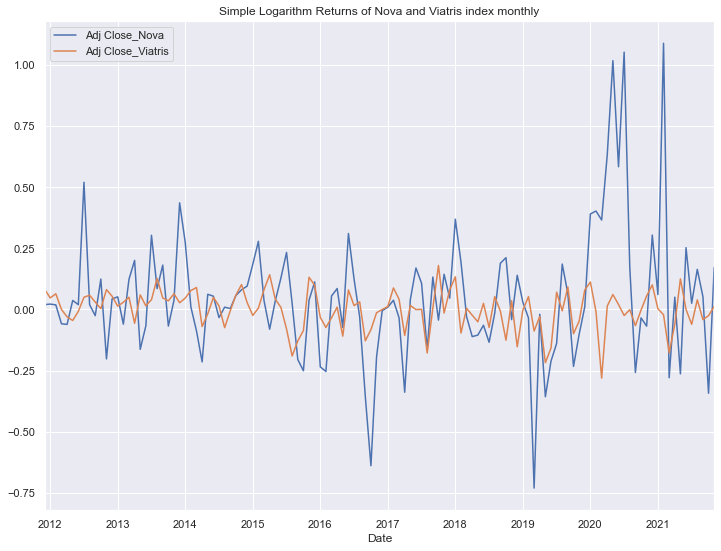

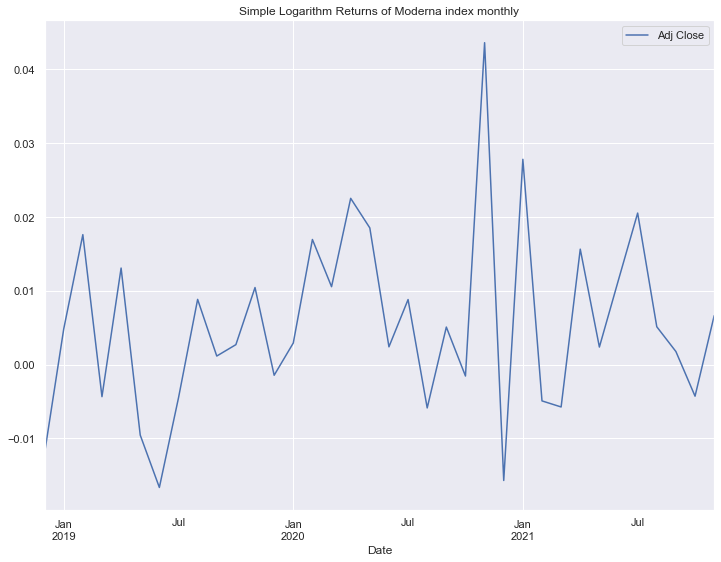

In [38]:
nova_viatris_returns.plot(grid=True, figsize=(12,9), title = 'Simple Logarithm Returns of Nova and Viatris index monthly');
moderna_returns_df.plot(grid=True, figsize=(12,9), title = 'Simple Logarithm Returns of Moderna index monthly');

#Novavax
Drop del più dell'85% a Settembre nel 2016 dopo l'annuncio della società che il suo vaccino sperimentale contro il virus respiratorio sinciziale (RSV) è fallito in uno studio in fase avanzata.
La società ha affermato che il suo studio "non ha dimostrato l'efficacia del vaccino" nella prevenzione di una malattia del tratto respiratorio inferiore negli anziani.
link articolo: https://www.cnbc.com/2016/09/16/novavax-plunges-80-after-failed-trial-analysts-downgrade.html



Altro drop significativo avvenuto a Febbraio del 2019, la società ha riferito che il suo vaccino contro il virus respiratorio sinciziale (RSV), ResVax, ha fallito ancora una volta in uno studio fondamentale.
Nel 2016, il vaccino ha fallito come misura preventiva contro l'infezione da RSV negli anziani. 
Questa volta, ResVax non è riuscito a produrre un livello significativo di protezione contro l'infezione da RSV nei neonati esposti al vaccino mentre erano nell'utero tramite l'immunizzazione materna.
link articolo: https://www.fool.com/investing/2019/03/05/why-novavax-stock-imploded-in-february.aspx



Gain significativo, invece, durante il 2020, avvenuto a seguito di tre eventi importanti. 

1: forse la cosa più importante, la notizia dei suoi studi di Fase III di successo per il suo vaccino COVID-19, NVX-CoV2373, nel Regno Unito e gli studi di Fase IIb in Sud Africa.
Dopo questa notizia sono stati effettuate richieste di vaccino da milioni di dosi dal Canada, Australia, Regno Unito, l'UE, La Nuova Zelanda, Giappone, miliardi di dosi all'India e un numero imprecisato di dosi alla Corea del Sud.

2. Ci sono inoltre dati che suggeriscono che alcuni vaccini concorrenti potrebbero essere meno efficaci contro i nuovi ceppi del virus SARS-CoV-2. Questa preoccupazione potrebbe aver contribuito al declassamento delle azioni di Moderna, che ho riportato proprio per confrontare i due rendimenti ma a quanto pare il gain delle azioni Novavax non ha contribuito ad un drop delle azioni di Moderna.

3. Secondo quanto riferito, la società sta lavorando per sviluppare versioni ancora più efficaci contro nuove varianti. 
Ha anche lanciato lo studio clinico di fase III PREVENT-19 negli Stati Uniti e in Messico alla fine di dicembre. 

Il COVID-19 è stato un vantaggio per Novavax e altre aziende che si occupano di produrre vaccini.

link articolo: https://www.biospace.com/article/novavax-stock-hits-all-time-high-exceeding-even-gamestop-s-gains/

#Viatris
Viatris ha avuto un andamento abbastanza regolare non essendo direttamente legato agli eventi scaturiti dal Covid-19. Per tale motivo riporto l'analisi da parte di un articolo su "The Motley Fool" per analizzare se potrebbe essere un buon investimento per il futuro.

Dato che è uno dei più grandi produttori di farmaci al mondo, è ragionevole pensare che Viatris (NASDAQ: VTRS) potrebbe essere uno stock affidabile per la creazione di ricchezza.
Le persone che investono ora potrebbero ottenere il vantaggio di anni e anni di apprezzamento dei prezzi mentre continua a generare lentamente flusso di cassa dai suoi mercati. E quella crescita potrebbe essere a basso rischio.
Tuttavia, solo pochi anni fa, la società era in realtà due entità separate. 
Uno era il produttore di farmaci, Mylan, e l'altro era l'unità aziendale di produzione di farmaci generici di Pfizer, Upjohn. 
Tuttavia, la fusione nel novembre 2020 tra i due ha lasciato molte domande persistenti sulle prospettive della performance di Viatris.

L'attrattiva più grande dell'acquisto di Viatris è che è un'azienda che produce prodotti farmaceutici su cui le persone reali fanno affidamento per mantenere la propria salute. 
In questo momento, le sue entrate totali sono in aumento grazie ai farmaci generici e ai biosimilari di nuova commercializzazione e nel secondo trimestre del 2021 ha registrato un aumento delle vendite del 69% rispetto allo stesso periodo del 2020. 
Poiché si prevede che il mercato dei farmaci biosimilari crescerà di 130 % fino al 2027, Viatris sarà ben posizionata per mantenere e far crescere la sua fetta di torta.

link articolo: https://www.fool.com/investing/2021/10/23/could-viatris-stock-help-you-retire-a-millionaire/


_______________________________________________________________________________________________________

correlazione tra Viatris e Novavax?

_______________________________________________________________________________________________________

In [39]:
import seaborn as sns

data_df = yf.download('NVAX VTRS', start='2011-11-30', end='2021-11-30')
data_df = data_df['Adj Close']
returns = data_df.pct_change()
returns = returns.dropna()
correlation = returns.corr()
correlation

[*********************100%***********************]  2 of 2 completed


,NVAX,VTRS
NVAX,1.000000,0.120011
VTRS,0.120011,1.000000


<AxesSubplot:>

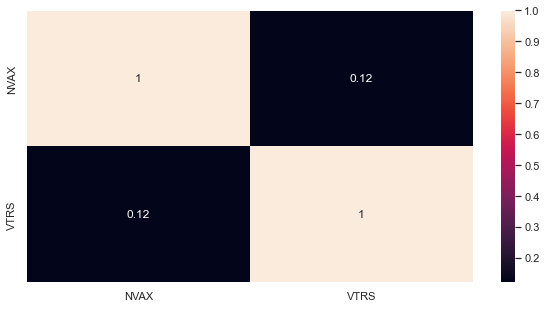

In [40]:
sns.set(rc ={'figure.figsize' : (10, 5)})
sns.heatmap(correlation, annot=True)

La correlazione positiva è quasi neutra del 0.12. Ma vediamo cosa succede se confrontiamo Novavax e Moderna (due produttori di vaccini durante la pandemia)

_______________________________________________________________________________________________________

correlazione tra Moderna e Novavax?

_______________________________________________________________________________________________________

In [104]:
import seaborn as sns

data_df = yf.download('NVAX MRNA', start='2011-11-30', end='2021-11-30')
data_df = data_df['Adj Close']
returns = data_df.pct_change()
returns = returns.dropna()
correlation = returns.corr()
correlation

[*********************100%***********************]  2 of 2 completed


,MRNA,NVAX
MRNA,1.000000,0.240901
NVAX,0.240901,1.000000


<AxesSubplot:>

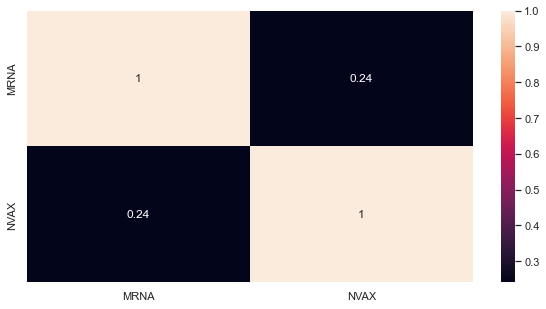

In [42]:
sns.set(rc ={'figure.figsize' : (10, 5)})
sns.heatmap(correlation, annot=True)

Sono correlate positivamente del 0.24 è leggermente maggiore ma comunque molto bassa pur essendo entrambi produttori di vaccini non sono correlati fortemente.

_______________________________________________________________________________________________________

c. Presentare i rendimenti con istogrammi e confrontare la dispersione dei rendimenti dei diversi titoli

_______________________________________________________________________________________________________

<AxesSubplot:ylabel='Density'>

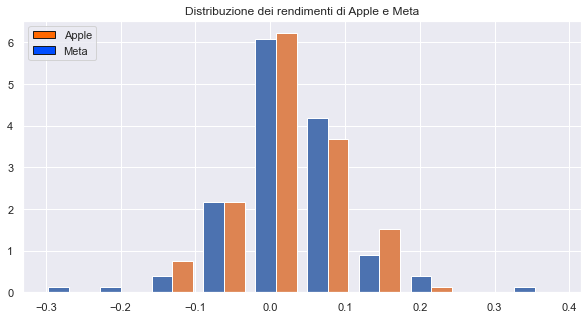

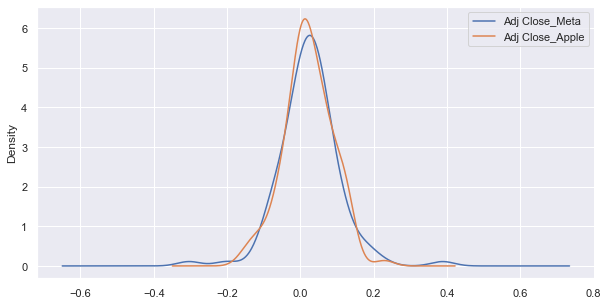

In [60]:
from matplotlib.patches import Rectangle

cmap = plt.get_cmap('jet')
color1 = cmap(0.8)
color2 =cmap(0.2)

plt.hist(apple_meta_returns, density = True)
plt.title('Distribuzione dei rendimenti di Apple e Meta')
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [color1, color2]]
labels= ["Apple","Meta"]
legend1 = plt.legend(handles, labels, loc='upper left')


apple_meta_returns.plot.density()

<AxesSubplot:ylabel='Density'>

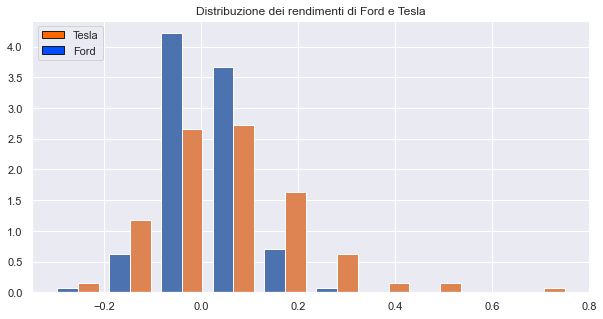

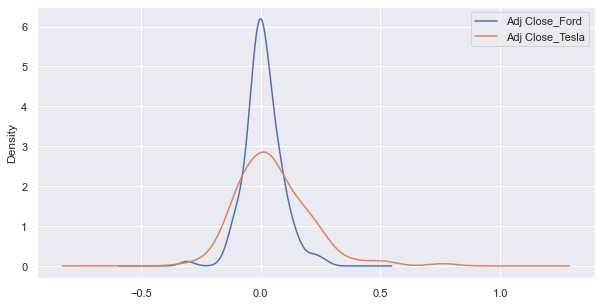

In [44]:
from matplotlib.patches import Rectangle

cmap = plt.get_cmap('jet')
color1 = cmap(0.8)
color2 =cmap(0.2)

plt.hist(ford_tesla_df_returns, density = True)
plt.title('Distribuzione dei rendimenti di Ford e Tesla')
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [color1, color2]]
labels= ["Tesla","Ford"]
legend1 = plt.legend(handles, labels, loc='upper left')

ford_tesla_df_returns.plot.density()

<AxesSubplot:ylabel='Density'>

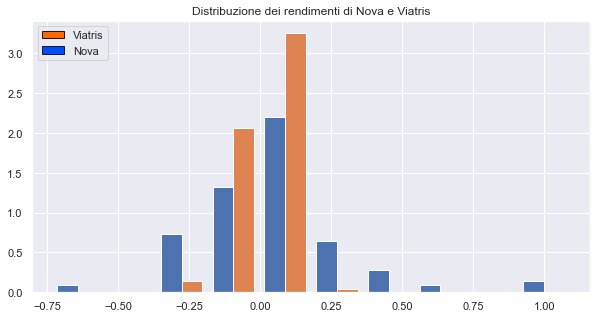

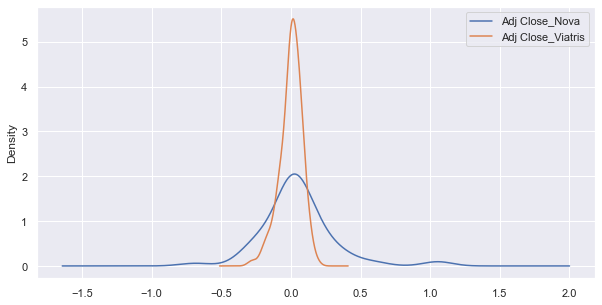

In [45]:
from matplotlib.patches import Rectangle

cmap = plt.get_cmap('jet')
color1 = cmap(0.8)
color2 =cmap(0.2)

plt.hist(nova_viatris_returns, density = True)
plt.title('Distribuzione dei rendimenti di Nova e Viatris')
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [color1, color2]]
labels= ["Viatris","Nova"]
legend1 = plt.legend(handles, labels, loc='upper left')

nova_viatris_returns.plot.density()

_______________________________________________________________________________________________________

 d. Creare grafici diagnostici a 4 sezioni (istogramma, kernel density, boxplot, qq-plot) per 
ciascuna serie di rendimenti e commentare (i rendimenti sono distribuiti normalmente?Ci sono outliers?)

_______________________________________________________________________________________________________

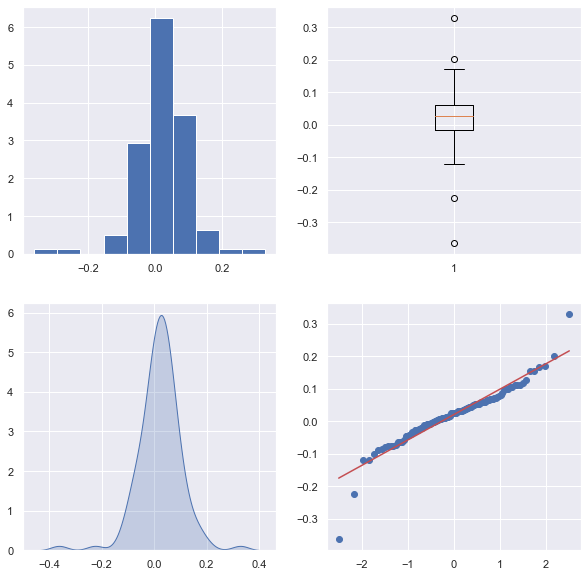

In [46]:
#Meta

import matplotlib.pyplot as plt
from scipy import stats

rendimenti_netti_meta = rendimenti_netti_meta.dropna()

plt.figure(figsize=(10,10))
plt.rc('font', size=10)

#Istogramma
plt.subplot(221)
plt.hist(rendimenti_netti_meta["Adj Close"], density = True)

#BoxPlot
plt.subplot(222)
plt.boxplot(rendimenti_netti_meta["Adj Close"])

#Kernel Density
plt.subplot(223)
sns.kdeplot(rendimenti_netti_meta["Adj Close"], shade=True)
plt.xlabel('') 
plt.ylabel('')

#qq-plot
plt.subplot(224)
stats.probplot(rendimenti_netti_meta["Adj Close"],dist='norm',plot=plt)
plt.title('') 
plt.xlabel('') 
plt.ylabel('')

plt.savefig('Meta.png', dpi=300, bbox_inches='tight')


Ci sono degli outliers: due tra 0.2 e 0.35 e due tra -0.2 e -0.4.


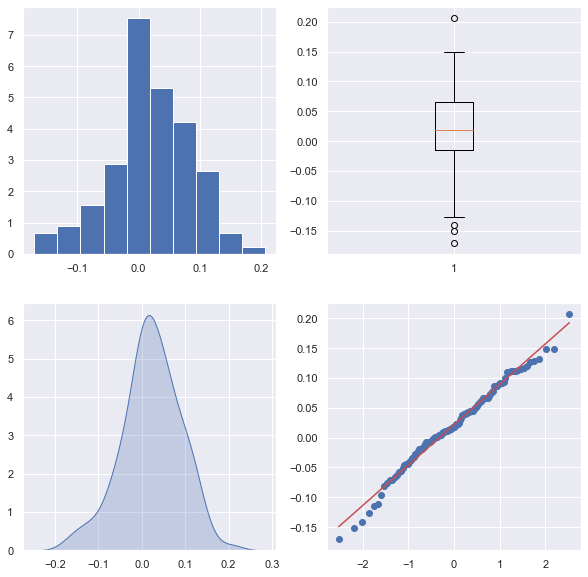

In [47]:
#Apple

rendimenti_netti_apple = rendimenti_netti_apple.dropna()

plt.figure(figsize=(10,10))
plt.rc('font', size=10)

#Istogramma
plt.subplot(221)
plt.hist(rendimenti_netti_apple["Adj Close"], density = True)

#BoxPlot
plt.subplot(222)
plt.boxplot(rendimenti_netti_apple["Adj Close"])

#Kernel Density
plt.subplot(223)
sns.kdeplot(rendimenti_netti_apple["Adj Close"], shade=True)
plt.xlabel('') 
plt.ylabel('')

#qq-plot
plt.subplot(224)
stats.probplot(rendimenti_netti_apple["Adj Close"],dist='norm',plot=plt)
plt.title('') 
plt.xlabel('') 
plt.ylabel('')

plt.savefig('Apple.png', dpi=300, bbox_inches='tight')

Ci sono degli outliers: uno tra 0.20 e 0.25 e tre tra -0.12 e -0.20.


[*********************100%***********************]  1 of 1 completed


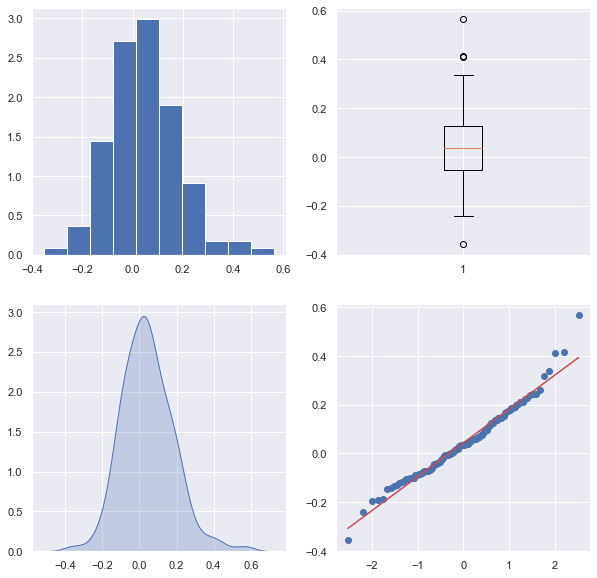

In [48]:
#Tesla
tesla_df = yf.download('TSLA', start='2011-11-30', end='2021-11-30')
tesla_df = tesla_df.groupby(pd.Grouper(freq='M')).mean()

tesla_df = tesla_df[['Adj Close']]
rendimenti_netti_tesla = np.log(tesla_df/tesla_df.shift(1))
rendimenti_netti_tesla = rendimenti_netti_tesla.dropna()

plt.figure(figsize=(10,10))
plt.rc('font', size=10)

#Istogramma
plt.subplot(221)
plt.hist(rendimenti_netti_tesla["Adj Close"], density = True)

#BoxPlot
plt.subplot(222)
plt.boxplot(rendimenti_netti_tesla["Adj Close"])

#Kernel Density
plt.subplot(223)
sns.kdeplot(rendimenti_netti_tesla["Adj Close"], shade=True)
plt.xlabel('') 
plt.ylabel('')

#qq-plot
plt.subplot(224)
stats.probplot(rendimenti_netti_tesla["Adj Close"],dist='norm',plot=plt)
plt.title('') 
plt.xlabel('') 
plt.ylabel('')

plt.savefig('Tesla.png', dpi=300, bbox_inches='tight')

Ci sono degli outliers: tre tra 0.4 e 0.6 e uno tra -0.22 e -0.4

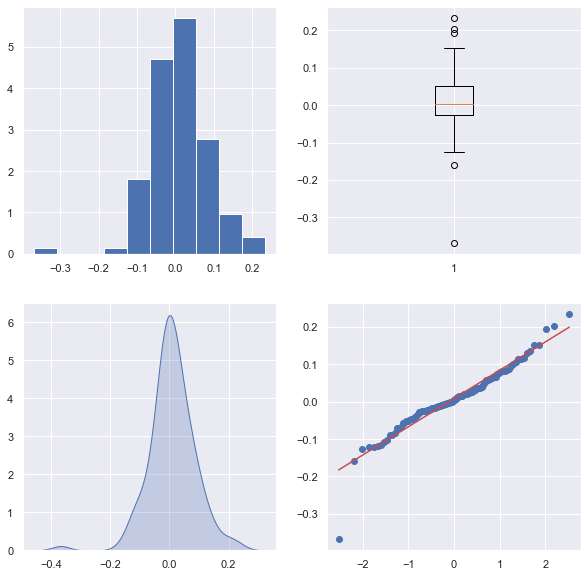

In [49]:
#Ford

rendimenti_netti_ford = rendimenti_netti_ford.dropna()

plt.figure(figsize=(10,10))
plt.rc('font', size=10)

#Istogramma
plt.subplot(221)
plt.hist(rendimenti_netti_ford["Adj Close"], density = True)

#BoxPlot
plt.subplot(222)
plt.boxplot(rendimenti_netti_ford["Adj Close"])

#Kernel Density
plt.subplot(223)
sns.kdeplot(rendimenti_netti_ford["Adj Close"], shade=True)
plt.xlabel('') 
plt.ylabel('')

#qq-plot
plt.subplot(224)
stats.probplot(rendimenti_netti_ford["Adj Close"],dist='norm',plot=plt)
plt.title('') 
plt.xlabel('') 
plt.ylabel('')

plt.savefig('Ford.png', dpi=300, bbox_inches='tight')

Ci sono degli outliers: tre tra 0.18 e 0.3 e due tra -0.15 e -0.4

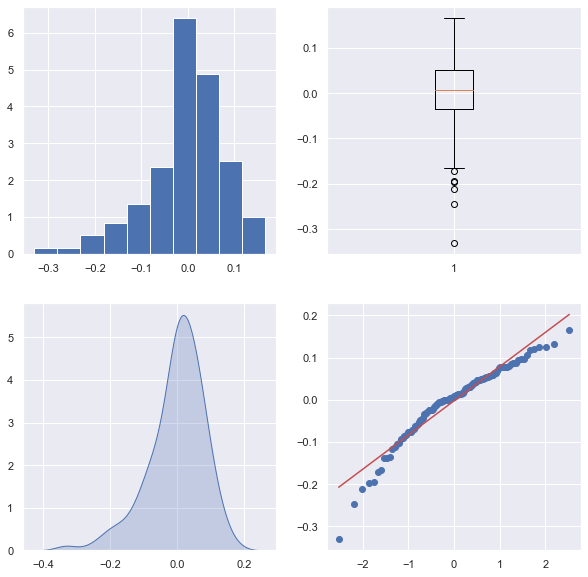

In [50]:
#Viatris

rendimenti_netti_viatris = rendimenti_netti_viatris.dropna()

plt.figure(figsize=(10,10))
plt.rc('font', size=10)

#Istogramma
plt.subplot(221)
plt.hist(rendimenti_netti_viatris["Adj Close"], density = True)

#BoxPlot
plt.subplot(222)
plt.boxplot(rendimenti_netti_viatris["Adj Close"])

#Kernel Density
plt.subplot(223)
sns.kdeplot(rendimenti_netti_viatris["Adj Close"], shade=True)
plt.xlabel('') 
plt.ylabel('')

#qq-plot
plt.subplot(224)
stats.probplot(rendimenti_netti_viatris["Adj Close"],dist='norm',plot=plt)
plt.title('') 
plt.xlabel('') 
plt.ylabel('')

plt.savefig('Viatris.png', dpi=300, bbox_inches='tight')

Ci sono outliers: -0.2, -0.25 e -0.35

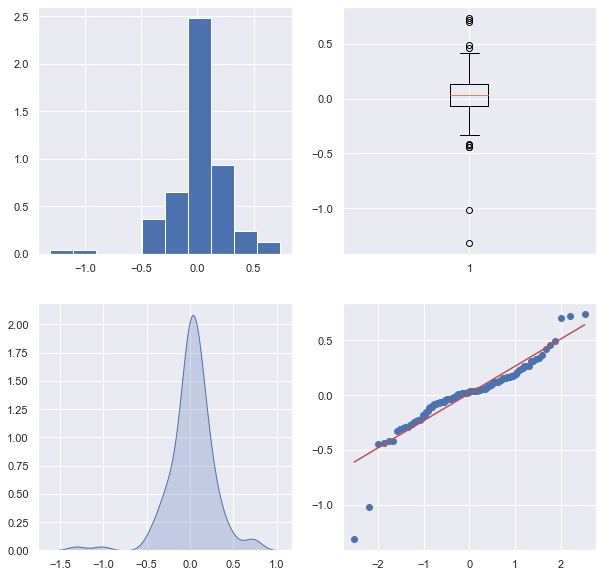

In [51]:
#Nova

rendimenti_netti_nova = rendimenti_netti_nova.dropna()

plt.figure(figsize=(10,10))
plt.rc('font', size=10)

#Istogramma
plt.subplot(221)
plt.hist(rendimenti_netti_nova["Adj Close"], density = True)

#BoxPlot
plt.subplot(222)
plt.boxplot(rendimenti_netti_nova["Adj Close"])

#Kernel Density
plt.subplot(223)
sns.kdeplot(rendimenti_netti_nova["Adj Close"], shade=True)
plt.xlabel('') 
plt.ylabel('')

#qq-plot
plt.subplot(224)
stats.probplot(rendimenti_netti_nova["Adj Close"],dist='norm',plot=plt)
plt.title('') 
plt.xlabel('') 
plt.ylabel('')

plt.savefig('Nova.png', dpi=300, bbox_inches='tight')

Ci sono degli outliers: cinque tra 0.40 e 1 e cinque tra -0.4 e -1.5

_______________________________________________________________________________________________________

e. Calcolare statistiche descrittive univariate (media, varianza, deviazione standard, asimmetria, curtosi)
per ogni serie di rendimenti e commentare.

_______________________________________________________________________________________________________

In [59]:
#Meta
statistiche_meta = pd.DataFrame()

media = round(rendimenti_netti_meta.mean(), 4)
varianza = round(rendimenti_netti_meta.var(), 4)
deviazione_standard = round(rendimenti_netti_meta.std(), 4)
asimmetria = round(rendimenti_netti_meta.skew(), 4)
kurtosi = round(rendimenti_netti_meta.kurtosis(), 4)
statistiche_meta["Media_Meta"] = media
statistiche_meta["Varianza_Meta"] = varianza
statistiche_meta["Deviazione_Meta"] = deviazione_standard
statistiche_meta["Asimmetria_Meta"] = asimmetria
statistiche_meta["Kurtosi_Meta"] = kurtosi
statistiche_meta


,Media_Meta,Varianza_Meta,Deviazione_Meta,Asimmetria_Meta,Kurtosi_Meta
Adj Close,0.0207,0.0065,0.0807,-0.5917,5.5871


In [58]:
#Apple
statistiche_apple = pd.DataFrame()

media = round(rendimenti_netti_apple.mean(), 4)
varianza = round(rendimenti_netti_apple.var(), 4)
deviazione_standard = round(rendimenti_netti_apple.std(), 4)
asimmetria = round(rendimenti_netti_apple.skew(), 4)
kurtosi = round(rendimenti_netti_apple.kurtosis(), 4)
statistiche_apple["Media_Apple"] = media
statistiche_apple["Varianza_Apple"] = varianza
statistiche_apple["Deviazione_Apple"] = deviazione_standard
statistiche_apple["Asimmetria_Apple"] = asimmetria
statistiche_apple["Kurtosi_Apple"] = kurtosi
statistiche_apple

,Media_Apple,Varianza_Apple,Deviazione_Apple,Asimmetria_Apple,Kurtosi_Apple
Adj Close,0.0216,0.0045,0.0672,-0.274,0.3757


In [61]:
#Tesla
statistiche_tesla = pd.DataFrame()

media = round(rendimenti_netti_tesla.mean(), 4)
varianza = round(rendimenti_netti_tesla.var(), 4)
deviazione_standard = round(rendimenti_netti_tesla.std(), 4)
asimmetria = round(rendimenti_netti_tesla.skew(), 4)
kurtosi = round(rendimenti_netti_tesla.kurtosis(), 4)
statistiche_tesla["Media_Tesla"] = media
statistiche_tesla["Varianza_Tesla"] = varianza
statistiche_tesla["Deviazione_Tesla"] = deviazione_standard
statistiche_tesla["Asimmetria_Tesla"] = asimmetria
statistiche_tesla["Kurtosi_Tesla"] = kurtosi
statistiche_tesla

,Media_Tesla,Varianza_Tesla,Deviazione_Tesla,Asimmetria_Tesla,Kurtosi_Tesla
Adj Close,0.043,0.0193,0.1389,0.5694,1.5031


In [62]:
#Ford
statistiche_ford = pd.DataFrame()

media = round(rendimenti_netti_ford.mean(), 4)
varianza = round(rendimenti_netti_ford.var(), 4)
deviazione_standard = round(rendimenti_netti_ford.std(), 4)
asimmetria = round(rendimenti_netti_ford.skew(), 4)
kurtosi = round(rendimenti_netti_ford.kurtosis(), 4)
statistiche_ford["Media_Ford"] = media
statistiche_ford["Varianza_Ford"] = varianza
statistiche_ford["Deviazione_Ford"] = deviazione_standard
statistiche_ford["Asimmetria_Ford"] = asimmetria
statistiche_ford["Kurtosi_Ford"] = kurtosi
statistiche_ford

,Media_Ford,Varianza_Ford,Deviazione_Ford,Asimmetria_Ford,Kurtosi_Ford
Adj Close,0.0086,0.006,0.0773,-0.5994,4.4455


In [63]:
#Nova
statistiche_nova = pd.DataFrame()

media = round(rendimenti_netti_nova.mean(), 4)
varianza = round(rendimenti_netti_nova.var(), 4)
deviazione_standard = round(rendimenti_netti_nova.std(), 4)
asimmetria = round(rendimenti_netti_nova.skew(), 4)
kurtosi = round(rendimenti_netti_nova.kurtosis(), 4)
statistiche_nova["Media_Nova"] = media
statistiche_nova["Varianza_Nova"] = varianza
statistiche_nova["Deviazione_Nova"] = deviazione_standard
statistiche_nova["Asimmetria_Nova"] = asimmetria
statistiche_nova["Kurtosi_Nova"] = kurtosi
statistiche_nova

,Media_Nova,Varianza_Nova,Deviazione_Nova,Asimmetria_Nova,Kurtosi_Nova
Adj Close,0.0162,0.0691,0.2629,-1.1915,7.0136


In [65]:
#Viatris
statistiche_viatris = pd.DataFrame()

media = round(rendimenti_netti_viatris.mean(), 4)
varianza = round(rendimenti_netti_viatris.var(), 4)
deviazione_standard = round(rendimenti_netti_viatris.std(), 4)
asimmetria = round(rendimenti_netti_viatris.skew(), 4)
kurtosi = round(rendimenti_netti_viatris.kurtosis(), 4)
statistiche_viatris["Media_Viatris"] = media
statistiche_viatris["Varianza_Viatris"] = varianza
statistiche_viatris["Deviazione_Viatris"] = deviazione_standard
statistiche_viatris["Asimmetria_Viatris"] = asimmetria
statistiche_viatris["Kurtosi_Viatris"] = kurtosi
statistiche_viatris

,Media_Viatris,Varianza_Viatris,Deviazione_Viatris,Asimmetria_Viatris,Kurtosi_Viatris
Adj Close,-0.0026,0.0068,0.0826,-1.077,1.927


Le azioni di Tesla e Apple hanno il rendimento più alto
Le azioni di Viatris e Ford hanno il rendimento più basso

Le azioni di Nova e Tesla hanno la deviazione standard più alta
Le azioni di Apple e Ford hanno la deviazione standard più bassa

Le azioni di Meta hanno una distribuzione dei rendimenti più vicina alla normale
Le azioni di Viatris hanno una distribuzione dei rendimenti più lontana dalla normale


_______________________________________________________________________________________________________

Come si evolvono nel tempo rendimento e volatilità?

_______________________________________________________________________________________________________

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Meta volatility: 36.44%')

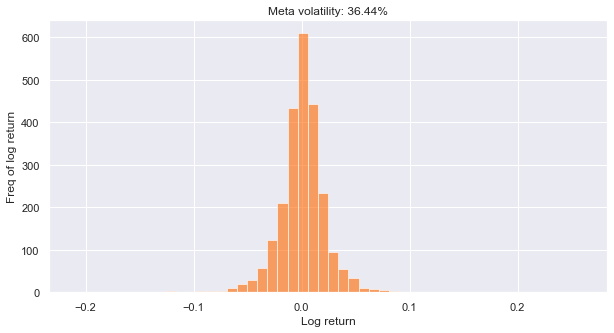

In [87]:
#Meta
color1 = cmap(0.8)

meta_df = yf.download('FB', start='2011-11-30', end='2021-11-30')
meta_daily_returns = meta_df[['Adj Close']]
rendimenti_netti_meta = np.log(meta_daily_returns['Adj Close']/meta_daily_returns['Adj Close'].shift(1))

volatility = rendimenti_netti_meta.std()*252**.5
str_vol = str(round(volatility, 4)*100)

fig, ax = plt.subplots()
rendimenti_netti_meta.hist(ax=ax, bins=50, alpha=0.6, color=color1)
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('Meta volatility: ' + str_vol + '%')

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Apple volatility: 28.310000000000002%')

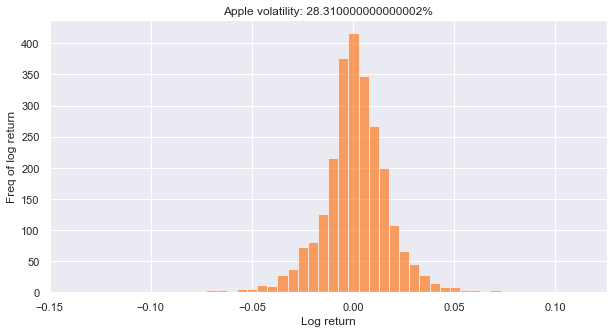

In [86]:
#Apple
color1 = cmap(0.8)

apple_df = yf.download('AAPL', start='2011-11-30', end='2021-11-30')
apple_daily_returns = apple_df[['Adj Close']]
rendimenti_netti_apple = np.log(apple_daily_returns['Adj Close']/apple_daily_returns['Adj Close'].shift(1))

volatility = rendimenti_netti_apple.std()*252**.5
str_vol = str(round(volatility, 4)*100)

fig, ax = plt.subplots()
rendimenti_netti_apple.hist(ax=ax, bins=50, alpha=0.6, color=color1)
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('Apple volatility: ' + str_vol + '%')

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Tesla volatility: 55.31%')

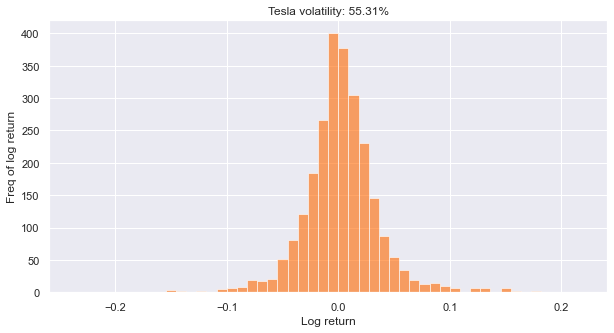

In [88]:
#Tesla
color1 = cmap(0.8)

tesla_df = yf.download('TSLA', start='2011-11-30', end='2021-11-30')
tesla_daily_returns = tesla_df[['Adj Close']]
rendimenti_netti_tesla = np.log(tesla_daily_returns['Adj Close']/tesla_daily_returns['Adj Close'].shift(1))

volatility = rendimenti_netti_tesla.std()*252**.5
str_vol = str(round(volatility, 4)*100)

fig, ax = plt.subplots()
rendimenti_netti_tesla.hist(ax=ax, bins=50, alpha=0.6, color=color1)
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('Tesla volatility: ' + str_vol + '%')

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Ford volatility: 30.7%')

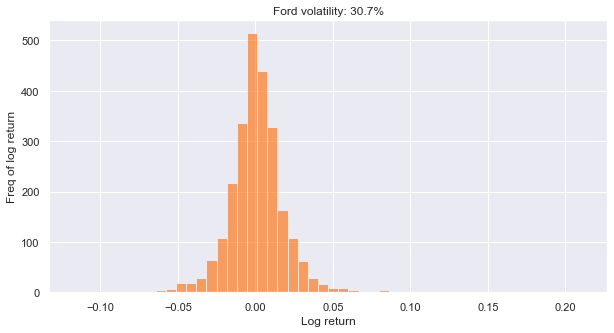

In [93]:
#Ford
color1 = cmap(0.8)

ford_df = yf.download('F', start='2011-11-30', end='2021-11-30')
ford_daily_returns = ford_df[['Adj Close']]
rendimenti_netti_ford = np.log(ford_daily_returns['Adj Close']/ford_daily_returns['Adj Close'].shift(1))

volatility = rendimenti_netti_ford.std()*252**.5
str_vol = str(round(volatility, 4)*100)

fig, ax = plt.subplots()
rendimenti_netti_ford.hist(ax=ax, bins=50, alpha=0.6, color=color1)
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('Ford volatility: ' + str_vol + '%')

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Nova volatility: 111.64%')

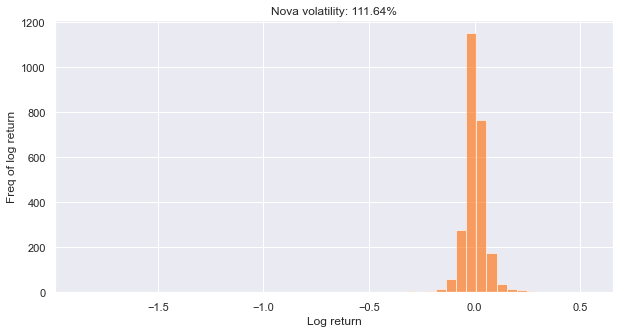

In [90]:
#Nova
color1 = cmap(0.8)

nova_df = yf.download('NVAX', start='2011-11-30', end='2021-11-30')
nova_daily_returns = nova_df[['Adj Close']]
rendimenti_netti_nova = np.log(nova_daily_returns['Adj Close']/nova_daily_returns['Adj Close'].shift(1))

volatility = rendimenti_netti_nova.std()*252**.5
str_vol = str(round(volatility, 4)*100)

fig, ax = plt.subplots()
rendimenti_netti_nova.hist(ax=ax, bins=50, alpha=0.6, color=color1)
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('Nova volatility: ' + str_vol + '%')

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Viatris volatility: 36.11%')

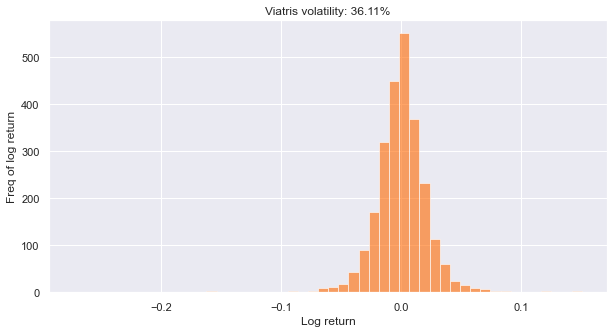

In [92]:
#Viatris
color1 = cmap(0.8)

viatris_df = yf.download('VTRS', start='2011-11-30', end='2021-11-30')
viatris_daily_returns = viatris_df[['Adj Close']]
rendimenti_netti_viatris = np.log(viatris_daily_returns['Adj Close']/viatris_daily_returns['Adj Close'].shift(1))

volatility = rendimenti_netti_viatris.std()*252**.5
str_vol = str(round(volatility, 4)*100)

fig, ax = plt.subplots()
rendimenti_netti_viatris.hist(ax=ax, bins=50, alpha=0.6, color=color1)
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('Viatris volatility: ' + str_vol + '%')

_______________________________________________________________________________________________________

Calcolare la matrice di varianze/covarianze dei rendimenti e commentare le relazioni fra 
i diversi titoli. Qual é più rischioso?

_______________________________________________________________________________________________________

In [106]:
df_together = yf.download('FB AAPL TSLA F NVAX VTRS', start='2011-11-30', end='2021-11-30')
returns = 100 * df_together['Adj Close'].pct_change().dropna()
returns.cov()

[*********************100%***********************]  6 of 6 completed


,AAPL,F,FB,NVAX,TSLA,VTRS
AAPL,3.166743,1.063645,1.654645,1.544614,1.984807,1.028852
F,1.063645,3.807045,1.032427,1.248996,1.750483,1.291187
FB,1.654645,1.032427,5.347862,2.030755,2.093348,1.023504
NVAX,1.544614,1.248996,2.030755,40.417929,2.733074,1.710530
TSLA,1.984807,1.750483,2.093348,2.733074,12.220001,1.474117
VTRS,1.028852,1.291187,1.023504,1.710530,1.474117,5.207252


Tesla e Novavax possiedono il valore di covarianza maggiore rispetto alle altre azioni di 2.7% le due azioni si comporteranno allo stesso modo; questo implica che se uno sale anche l'altro sale e viceversa aumentando il rischio del portafoglio.

Facebook e Viatris producono un valore di covarianza di 1.02% e risulta, seppur essendo positiva, il set di azioni meno rischioso da possedere nel portafoglio (confrontando le azioni sopra prese in considerazione).

_______________________________________________________________________________________________________

Calcolare la matrice di correlazione dei rendimenti.

_______________________________________________________________________________________________________

In [107]:
returns.corr()

,AAPL,F,FB,NVAX,TSLA,VTRS
AAPL,1.000000,0.306335,0.402076,0.136529,0.319063,0.253362
F,0.306335,1.000000,0.228810,0.100689,0.256642,0.289995
FB,0.402076,0.228810,1.000000,0.138128,0.258950,0.193952
NVAX,0.136529,0.100689,0.138128,1.000000,0.122978,0.117907
TSLA,0.319063,0.256642,0.258950,0.122978,1.000000,0.184796
VTRS,0.253362,0.289995,0.193952,0.117907,0.184796,1.000000


Le azioni più correlate sono quelle di Apple e Meta con un indice di correlazione del 0.4

Le azioni meno correalte sono quelle di Ford e Novavax con un indice di correlazione del 0.1